## Motion of The Damped, Driven Pendulum

<font  face=Times color=darkblue size=3> Now, we use Runge-Kutta method to study the driven pendulum, $$x^{''}= -k\sin{x}-\gamma x^{'}+Q\sin(t\Omega)$$ 
    <br> We set Q=1 and $\gamma$=0.1 and must be careful as $x$ is a cyclic angular variable (did not care when there is no driving force), the restriction is $x\in [-\pi,\pi]$.

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Define a function with changing parameters for the driven case
k=1
def driven_pendulum(x_initial,v_initial,gamma_here,Q_here,omega_here,tau_here,time_steps):
    t_pen=[0]
    v_pen=[v_initial]
    x_pen=[x_initial]
    gamma=gamma_here
    Q=Q_here
    omega=omega_here
    tau=tau_here
    for i in range(1,time_steps):
        t_pen.append(tau*i)
        k1=tau*v_pen[i-1]
        l1=tau*(-k*np.sin(x_pen[i-1])-gamma*v_pen[i-1]+Q*np.sin(tau*i*omega))
        k2=tau*(v_pen[i-1]+0.5*l1)
        l2=tau*(-k*np.sin(x_pen[i-1]+0.5*k1)-gamma*(v_pen[i-1]+0.5*l1)+Q*np.sin(tau*(i+0.5)*omega))
        k3=tau*(v_pen[i-1]+0.5*l2)
        l3=tau*(-k*np.sin(x_pen[i-1]+0.5*k2)-gamma*(v_pen[i-1]+0.5*l2)+Q*np.sin(tau*(i+0.5)*omega))
        k4=tau*(v_pen[i-1]+l3)
        l4=tau*(-k*np.sin(x_pen[i-1]+k3)-gamma*(v_pen[i-1]+l3)+Q*np.sin(tau*(i+1)*omega))
        xnew=x_pen[i-1]+(1/6)*(k1+2*k2+2*k3+k4)
        if xnew>np.pi:
            xnew=xnew-2*np.pi
        if xnew<-np.pi:
            xnew=xnew+2*np.pi
        x_pen.append(xnew)
        v_pen.append(v_pen[i-1]+(1/6)*(l1+2*l2+2*l3+l4))
    return t_pen,v_pen,x_pen

In [70]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.1,Q_here=1,omega_here=2,tau_here=0.01,time_steps=20000)

Text(0, 0.5, 'x')

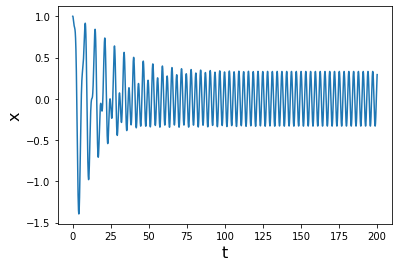

In [71]:
# plot the position x of the pendulum
plt.plot(t_list,x_list)
plt.xlabel('t',size=16)
plt.ylabel('x',size=16)

<font  face=Times color=darkblue size=3> We see that the pendulum after an initial damped, irregular motion takes on a periodic oscillation.
    <br><br>In phase space, as plotted below, the trajectory is seen to be eventually driven towards a cyclic attractor.

(-3.0, 3.0)

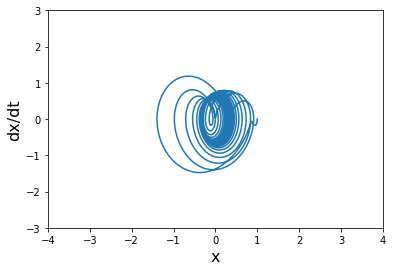

In [72]:
plt.plot(x_list,v_list)
plt.xlabel('x',size=16)
plt.ylabel('dx/dt',size=16)
plt.xlim(-4,4)
plt.ylim(-3,3)

<font  face=Times color=darkblue size=3> One can better better resolve the attractor by skipping the transient part when plotting. An example is when we set $\gamma=0.5$, $Q=1.06$, and $\Omega=2/3$ as shown below.

In [73]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=1.04,omega_here=2/3,tau_here=0.01,time_steps=20000)

Text(0, 0.5, 'x')

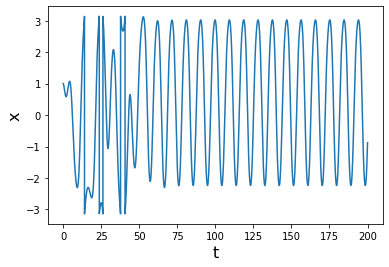

In [74]:
# plot the position x of the pendulum
plt.plot(t_list,x_list)
plt.xlabel('t',size=16)
plt.ylabel('x',size=16)

Text(0, 0.5, 'dx/dt')

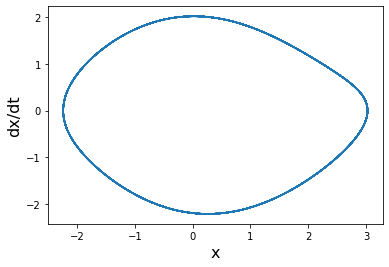

In [75]:
plt.plot(x_list[10000:],v_list[10000:]) # skipping time_steps=0-10000
plt.xlabel('x',size=16)
plt.ylabel('dx/dt',size=16)

<font  face=Times color=darkblue size=3> We see that the attractor is not symmetric under the reflection $(x,v)\rightarrow (-x,-v)$, which corresponds to a breaking of reflection symmetry.
   <br><br>
    If we further increase $Q$ to $1.07$, a period doubling occurs, as shown below.

In [82]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=1.07,omega_here=2/3,tau_here=0.01,time_steps=50000)

(0.0, 400.0)

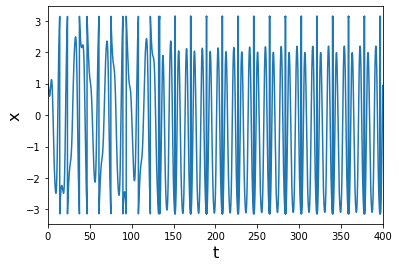

In [83]:
# plot the position x of the pendulum
plt.plot(t_list,x_list)
plt.xlabel('t',size=16)
plt.ylabel('x',size=16)
plt.xlim(0,400)

Text(0, 0.5, 'dx/dt')

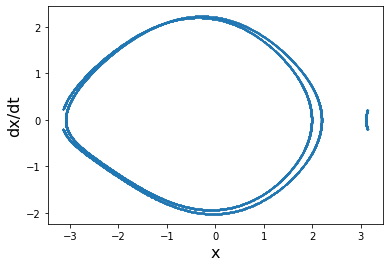

In [84]:
plt.scatter(x_list[30000:],v_list[30000:],s=0.2) 
plt.xlabel('x',size=16)
plt.ylabel('dx/dt',size=16)

<font  face=Times color=darkblue size=3> Further increasing $Q$ will result in more and more period doubing, until eventually a new behavior obtained.

In [98]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=1.08,omega_here=2/3,tau_here=0.01,time_steps=50000)

(0.0, 400.0)

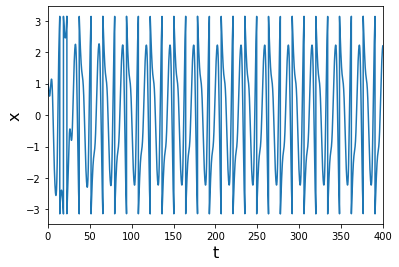

In [99]:
# plot the position x of the pendulum
plt.plot(t_list,x_list)
plt.xlabel('t',size=16)
plt.ylabel('x',size=16)
plt.xlim(0,400)

Text(0, 0.5, 'dx/dt')

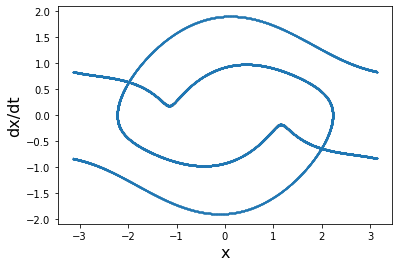

In [100]:
plt.scatter(x_list[30000:],v_list[30000:],s=0.2) 
plt.xlabel('x',size=16)
plt.ylabel('dx/dt',size=16)

In [101]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=1.2,omega_here=2/3,tau_here=0.01,time_steps=100000)

(0.0, 400.0)

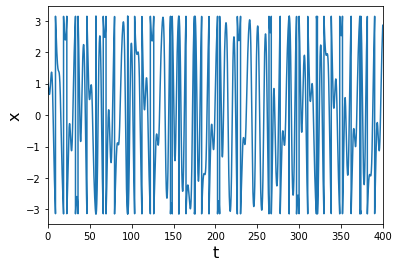

In [102]:
# plot the position x of the pendulum
plt.plot(t_list,x_list)
plt.xlabel('t',size=16)
plt.ylabel('x',size=16)
plt.xlim(0,400)

Text(0, 0.5, 'dx/dt')

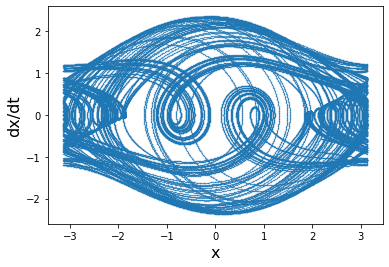

In [103]:
plt.scatter(x_list[10000:],v_list[10000:],s=0.1) 
plt.xlabel('x',size=16)
plt.ylabel('dx/dt',size=16)

<font  face=Times color=darkblue size=3> The figure above shows the phase space when $Q=1.2$. In this case, the motion never closes, and the attractor fills a finite region of the two-dimensional phase space. 

<font  face=Times color=darkblue size=3> To locate better the chaotic regime upon varing Q, we now construct a bifurcation diagram. For example, for any given Q, we record the velocity as the angle x passes the value 0 from above.

In [104]:
def driven_pendulum_bif(x_initial,v_initial,gamma_here,Q_here,omega_here,tau_here,time_steps):
    t_pen=[0]
    v_pen=[v_initial]
    x_pen=[x_initial]
    turn=[0]          #to record whether the obtained x is beyond range, save "0" if not, else save "1"
    gamma=gamma_here
    Q=Q_here
    omega=omega_here
    tau=tau_here
    for i in range(1,time_steps):
        t_pen.append(tau*i)
        k1=tau*v_pen[i-1]
        l1=tau*(-k*np.sin(x_pen[i-1])-gamma*v_pen[i-1]+Q*np.sin(tau*i*omega))
        k2=tau*(v_pen[i-1]+0.5*l1)
        l2=tau*(-k*np.sin(x_pen[i-1]+0.5*k1)-gamma*(v_pen[i-1]+0.5*l1)+Q*np.sin(tau*(i+0.5)*omega))
        k3=tau*(v_pen[i-1]+0.5*l2)
        l3=tau*(-k*np.sin(x_pen[i-1]+0.5*k2)-gamma*(v_pen[i-1]+0.5*l2)+Q*np.sin(tau*(i+0.5)*omega))
        k4=tau*(v_pen[i-1]+l3)
        l4=tau*(-k*np.sin(x_pen[i-1]+k3)-gamma*(v_pen[i-1]+l3)+Q*np.sin(tau*(i+1)*omega))
        xnew=x_pen[i-1]+(1/6)*(k1+2*k2+2*k3+k4)
        if xnew>np.pi:
            xnew=xnew-2*np.pi
            turn.append(1)
        elif xnew<-np.pi:
            xnew=xnew+2*np.pi
            turn.append(1)
        else:
            turn.append(0)
        x_pen.append(xnew)
        v_pen.append(v_pen[i-1]+(1/6)*(l1+2*l2+2*l3+l4))
    return v_pen,x_pen,turn

In [105]:
v_bif=[]
Q_bif=[]
for iq in range(100): #Q=0-1
    time_steps=20000
    Q_here=0+iq*0.01
    v_list,x_list,turn_list=driven_pendulum_bif(x_initial=1,v_initial=0,gamma_here=0.5,
                                         Q_here=Q_here,omega_here=2/3,tau_here=0.01,time_steps=time_steps)
    for ib in range(10000,time_steps):
        if x_list[ib]<0 and x_list[ib-1]>=0 and turn_list[ib]==0:
            v_bif.append((v_list[ib]+v_list[ib-1])/2)
            Q_bif.append(Q_here)
    #print(iq)
for iq in range(400): #Q=1-1.83
    time_steps=20000
    Q_here=1+iq*0.002075
    v_list,x_list,turn_list=driven_pendulum_bif(x_initial=1,v_initial=0,gamma_here=0.5,
                                         Q_here=Q_here,omega_here=2/3,tau_here=0.01,time_steps=time_steps)
    for ib in range(10000,time_steps):
        if x_list[ib]<0 and x_list[ib-1]>=0 and turn_list[ib]==0:
            v_bif.append((v_list[ib]+v_list[ib-1])/2)
            Q_bif.append(Q_here)
    #print(iq)
for iq in range(200):
    time_steps=80000
    Q_here=1.83+iq*0.0002 #Q=1.83-1.87
    v_list,x_list,turn_list=driven_pendulum_bif(x_initial=1,v_initial=0,gamma_here=0.5,
                                         Q_here=Q_here,omega_here=2/3,tau_here=0.005,time_steps=time_steps)
    for ib in range(40000,time_steps):
        if x_list[ib]<0 and x_list[ib-1]>=0 and turn_list[ib]==0:
            v_bif.append((v_list[ib]+v_list[ib-1])/2)
            Q_bif.append(Q_here)
    #print(iq)
for iq in range(100):
    time_steps=15000
    Q_here=1.87+iq*0.0013 #Q=1.87-2
    v_list,x_list,turn_list=driven_pendulum_bif(x_initial=1,v_initial=0,gamma_here=0.5,
                                         Q_here=Q_here,omega_here=2/3,tau_here=0.01,time_steps=time_steps)
    for ib in range(5000,time_steps):
        if x_list[ib]<0 and x_list[ib-1]>=0 and turn_list[ib]==0:
            v_bif.append((v_list[ib]+v_list[ib-1])/2)
            Q_bif.append(Q_here)
    #print(iq)

Text(0.5, 1.0, 'Bifurcation diagram')

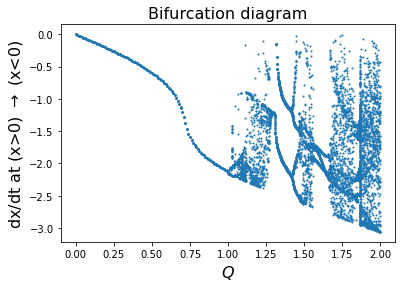

In [106]:
plt.scatter(Q_bif,v_bif,s=1)
#plt.xlim(0.5,2)
plt.ylabel(r"dx/dt at (x>0) $\rightarrow$ (x<0)",size=16)
plt.xlabel(r"$Q$",size=16)
plt.title("Bifurcation diagram",size=16)

<font  face=Times color=darkblue size=3> The diagram also exhibits self-similarity, as shown below.

Text(0.5, 1.0, 'Self-similarity')

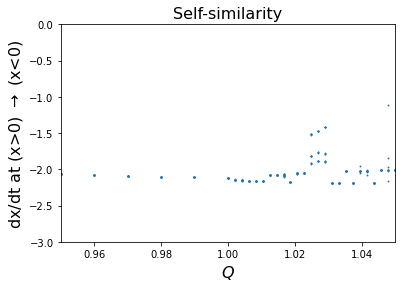

In [130]:
plt.scatter(Q_bif,v_bif,s=0.8)
plt.xlim(0.95,1.05)
plt.ylim(-3,0)
plt.ylabel(r"dx/dt at (x>0) $\rightarrow$ (x<0)",size=16)
plt.xlabel(r"$Q$",size=16)
plt.title("Self-similarity",size=16)

<font  face=Times color=darkblue size=3> Then we do spectral analysis of the dynamic variable x(t). We use Discrete Fourier Transformation at frequencies $$f_k=\frac{k}{N_\tau},\ \ \ k=0,1,...N-1$$ with $$g_k=g(f_k)=\sum_{j=0}^{N-1}e^{-2\pi ikj/N}x_j.$$ Then define the periodogram as an approximation to the power spectrum using the Discrete Fourier transformation as $$P_l(f_k)=\frac{1}{N^2}[|g_k|^2|g_{N-k}^2|]\ \ \ k=1,2,\frac{N}{2}-1;\ \ \ P_l(0)=\frac{1}{N^2}|g_0|^2;\ \ \ P_l(f_{\frac{N}{2}})=\frac{1}{N^2}|g_{\frac{N}{2}}|^2 $$
    <br><br>
    We analyze two sets of parameters, including periodic regime and chaotic regime, as below.

In [132]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=0.95,omega_here=2/3,
                                     tau_here=1,time_steps=2000) #periodic_regime
t_list1,v_list1,x_list1=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=1.08,omega_here=2/3,
                                        tau_here=1,time_steps=2000) # chaotic_regime

In [133]:
N_here=2000
from scipy.fftpack import fft    # Fast Fourier Transformation
fftl=np.abs(fft(x_list[0:2000]))
fftl1=np.abs(fft(x_list1[0:2000]))

In [134]:
P_list=np.zeros(int(N_here/2+1))  
P_list[0]=fftl[0]**2/(N_here**2)
P_list[int(N_here/2)]=fftl[int(N_here/2)]**2/(N_here**2)
for i in range(1,int(N_here/2)):
    P_list[i]=(fftl[i]**2+fftl[N_here-i]**2)/(N_here**2)
P_list1=np.zeros(int(N_here/2+1))
P_list1[0]=fftl1[0]**2/(N_here**2)
P_list1[int(N_here/2)]=fftl1[int(N_here/2)]**2/(N_here**2)
for i in range(1,int(N_here/2)):
    P_list1[i]=(fftl1[i]**2+fftl1[N_here-i]**2)/(N_here**2)

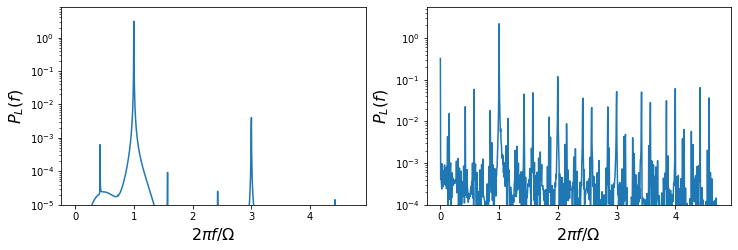

In [135]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(3*np.pi*np.arange(len(P_list))/N_here,P_list)
plt.semilogy()
plt.ylim(0.00001,)
plt.xlabel(r"$2\pi f/\Omega$",size=16)
plt.ylabel(r"$P_L(f)$",size=16)


plt.subplot(222)
plt.plot(3*np.pi*np.arange(len(P_list1))/N_here,P_list1)
plt.semilogy()
plt.ylim(0.0001,)
plt.xlabel(r"$2\pi f/\Omega$",size=16)
plt.ylabel(r"$P_L(f)$",size=16)
plt.show()

<font  face=Times color=darkblue size=3> In the periodic regime, we can see separated sharp peaks and the broadening of the major peak can be reduced by increasing the numbers of data we use. In the chaotic regime, although it is quite irregular, it still shows noticeable peaks at frequencies.